## Введение

В этой работе проводится исследовательский анализ данных (EDA) океанографического датасета 1949-2016 годов. Датасет содержит информацию о круизах исследовательских судов, координатах станций, метеорологических условиях и параметрах воды.

**Цель работы:** провести структурную проверку данных, оценить их качество и полноту, выявить выбросы и аномалии.

## 1. Загрузка и первичный осмотр данных

Загружаем датасет и проверяем его базовые характеристики: размер, структуру, первые строки.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np

# Загрузка данных
df = pd.read_csv('raw.csv', low_memory=False)

# Размер датасета
print("Размер датасета (строки, столбцы):", df.shape)
print("\nПервые 5 строк:")
df.head()


Размер датасета (строки, столбцы): (34404, 61)

Первые 5 строк:


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


## 1.2. Типы данных и структура

Проверяем типы данных каждого столбца, чтобы понять, какие переменные числовые, категориальные или даты.

### И преобразование дат

Преобразуем столбец Date из текстового формата в формат даты для дальнейшей работы.



In [2]:
# Типы данных
print("Типы данных:")
print(df.dtypes)


Типы данных:
Cst_Cnt         int64
Cruise_ID      object
Cruise          int64
Cruz_Sta        int64
DbSta_ID        int64
               ...   
Wet_T         float64
Wea           float64
Cloud_Typ     float64
Cloud_Amt     float64
Visibility    float64
Length: 61, dtype: object


In [3]:
# Преобразование столбца Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print("Столбец Date (первые 5 значений):")
print(df['Date'].head())
print(f"\nТип данных: {df['Date'].dtype}")

Столбец Date (первые 5 значений):
0   1949-03-01
1   1949-03-01
2   1949-03-02
3   1949-03-02
4   1949-03-02
Name: Date, dtype: datetime64[ns]

Тип данных: datetime64[ns]


### Выводы:
- Датасет содержит **34,404 строк** и **61 столбец**.
  Данные охватывают океанографические измерения 1949-1950 годов.
- В датасете присутствуют как числовые, так и текстовые столбцы.
- Большинство столбцов с координатами и метеоданными имеют тип **float64** (числа с дробной частью).
- Идентификаторы круизов и судов — текстовые (object).
- Даты успешно преобразованы в тип **datetime64[ns]**.
  Теперь можно извлекать год, месяц, строить временные ряды.



## 2. Оценка целостности и полноты данных

В этом разделе проверяем:
- Количество пропущенных значений по столбцам
- Долю пропусков (в процентах)
- Наличие дубликатов записей
- Уникальность идентификаторов
- Полноту данных за нужный период (диапазон дат)


### 2.1. Пропущенные значения

Проверим, в каких столбцах есть пропуски и сколько их.


In [4]:
# Количество пропусков по столбцам
missing_count = df.isnull().sum()

# Доля пропусков (в процентах)
missing_percent = (df.isnull().sum() / len(df)) * 100

# Создаём таблицу с информацией о пропусках
missing_data = pd.DataFrame({
    'Столбец': missing_count.index,
    'Пропусков': missing_count.values,
    'Процент (%)': missing_percent.values
})

# Оставляем только столбцы с пропусками
missing_data = missing_data[missing_data['Пропусков'] > 0].sort_values('Пропусков', ascending=False)

print(f"Всего столбцов с пропусками: {len(missing_data)}")
print("\nТоп-10 столбцов с наибольшим количеством пропусков:")
missing_data.head(10)


Всего столбцов с пропусками: 29

Топ-10 столбцов с наибольшим количеством пропусков:


,Столбец,Пропусков,Процент (%)
38,Cruz_Leg,32940,95.744681
32,ForelU,32327,93.962911
47,Civil_T,32288,93.849552
46,PST_LAN,32287,93.846646
43,IntC14,32275,93.811766
44,Inc_Str,32271,93.800140
45,Inc_End,32271,93.800140
48,TimeZone,29622,86.100453
31,Secchi,29141,84.702360
60,Visibility,24897,72.366585


### 2.2. Проверка на дубликаты

Проверим, есть ли полностью одинаковые строки.


In [6]:
# Количество дубликатов
duplicate_count = df.duplicated().sum()

print(f"Количество дубликатов: {duplicate_count}")

# Если есть дубликаты, посмотрим на них
if duplicate_count > 0:
    print("\nПримеры дубликатов:")
    print(df[df.duplicated(keep=False)].head())
else:
    print("Дубликатов не найдено.")


Количество дубликатов: 0
Дубликатов не найдено.


### 2.3. Полнота данных по периоду

Проверим, охватывают ли данные весь нужный период (1949-1950 годы), нет ли больших пропусков во времени.


In [7]:
# Диапазон дат
min_date = df['Date'].min()
max_date = df['Date'].max()

print(f"Минимальная дата: {min_date}")
print(f"Максимальная дата: {max_date}")
print(f"Период охвата: {(max_date - min_date).days} дней")

# Проверка пропусков в датах
missing_dates = df['Date'].isnull().sum()
print(f"\nПропущенных дат: {missing_dates}")


Минимальная дата: 1949-02-28 00:00:00
Максимальная дата: 2016-11-21 00:00:00
Период охвата: 24738 дней

Пропущенных дат: 0


## Общий вывод по оценке целостности и полноты данных

- Большинство **метеорологических и вспомогательных параметров** имеют пропуски 70-95%.
- **Координаты, даты и основные идентификаторы** заполнены полностью (0% пропусков).
- **Дубликатов не найдено** — каждая запись уникальна. Каждая строка соответствует уникальному измерению на конкретной станции в конкретное время.

**Диапазон дат:**
- **Минимальная дата:** 1949-02-28
- **Максимальная дата:** 2016-11-21
- **Период охвата:** 24,738 дней (~67.7 лет)

### Ограничения датасета:
⚠️ **Высокий процент пропусков** в вспомогательных и метеорологических параметрах (70-95%).  
⚠️ **Неравномерное распределение данных:** Больше данных в ранние годы (1949-1950) и современный период, меньше — в промежуточные десятилетия.


### *немного цифр для моего понимания

In [8]:
# Количество уникальных дат
unique_dates = df['Date'].dt.date.nunique()

print(f"Всего строк (станций): {len(df)}")
print(f"Уникальных дат: {unique_dates}")
print(f"Среднее количество станций в день: {len(df) / unique_dates:.2f}")

# Количество круизов
unique_cruises = df['Cruise_ID'].nunique()
print(f"\nВсего круизов: {unique_cruises}")
print(f"Среднее количество станций на круиз: {len(df) / unique_cruises:.2f}")


Всего строк (станций): 34404
Уникальных дат: 6466
Среднее количество станций в день: 5.32

Всего круизов: 645
Среднее количество станций на круиз: 53.34


## 3. Оценка выбросов и аномалий

В этом разделе используем метод **IQR (Interquartile Range)** для выявления экстремальных значений в числовых столбцах.

**Метод IQR:**
- Вычисляем Q1 (25-й перцентиль) и Q3 (75-й перцентиль)
- IQR = Q3 - Q1
- Выбросы: значения < Q1 - 1.5 × IQR или > Q3 + 1.5 × IQR

**Цель:** Очистить данные от шумов и ложных значений, которые могут помешать анализу.


In [11]:
# Выбираем только числовые столбцы для анализа
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Исключаем идентификаторы и технические поля
exclude_cols = ['DbSta_ID', 'Cast_ID', 'Cst_Cnt', 'Cruz_Sta']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

print(f"Количество числовых столбцов для анализа: {len(numeric_cols)}")
print(f"\nПроверяемые столбцы: {numeric_cols[:10]}...")  # Показываем первые 10


Количество числовых столбцов для анализа: 40

Проверяемые столбцы: ['Cruise', 'Quarter', 'Distance', 'Year', 'Month', 'Julian_Date', 'Julian_Day', 'Lat_Dec', 'Lat_Deg', 'Lat_Min']...


In [12]:
# Функция для поиска выбросов по методу IQR (без scipy)
def detect_outliers_iqr(df, column):
    """
    Выявление выбросов методом IQR для одного столбца.
    Возвращает количество и процент выбросов.
    """
    # Удаляем пропуски
    data = df[column].dropna()
    
    if len(data) == 0:
        return 0, 0.0
    
    # Вычисляем квартили
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Границы выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Подсчёт выбросов
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(data)) * 100
    
    return outlier_count, outlier_percent

print("Функция для поиска выбросов готова!")


Функция для поиска выбросов готова!


In [13]:
# Анализ выбросов для всех числовых столбцов

outlier_results = []

for col in numeric_cols:
    count, percent = detect_outliers_iqr(df, col)
    outlier_results.append({
        'Столбец': col,
        'Количество выбросов': count,
        'Процент выбросов (%)': round(percent, 2)
    })

# Создаём таблицу результатов
outlier_df = pd.DataFrame(outlier_results)
outlier_df = outlier_df[outlier_df['Количество выбросов'] > 0].sort_values('Процент выбросов (%)', ascending=False)

print("=" * 60)
print("РЕЗУЛЬТАТЫ АНАЛИЗА ВЫБРОСОВ (метод IQR)")
print("=" * 60)
print(f"\nВсего столбцов с выбросами: {len(outlier_df)}")
print("\nТоп-10 столбцов с наибольшим процентом выбросов:")
print(outlier_df.head(10))


РЕЗУЛЬТАТЫ АНАЛИЗА ВЫБРОСОВ (метод IQR)

Всего столбцов с выбросами: 29

Топ-10 столбцов с наибольшим процентом выбросов:
      Столбец  Количество выбросов  Процент выбросов (%)
37  Cloud_Typ                 2260                 22.78
24   Cruz_Leg                  275                 18.78
31   Wind_Dir                 4482                 13.61
28   Wave_Dir                 1686                 13.43
25     IntChl                 1336                 10.95
26     IntC14                  172                  8.08
33  Barometer                 1260                  6.61
36        Wea                 1754                  6.54
22  Order_Occ                  527                  5.29
7     Lat_Dec                 1236                  3.59


### 3.1. Визуализация выбросов

Построим box plot для ключевых числовых столбцов, чтобы визуально оценить выбросы.


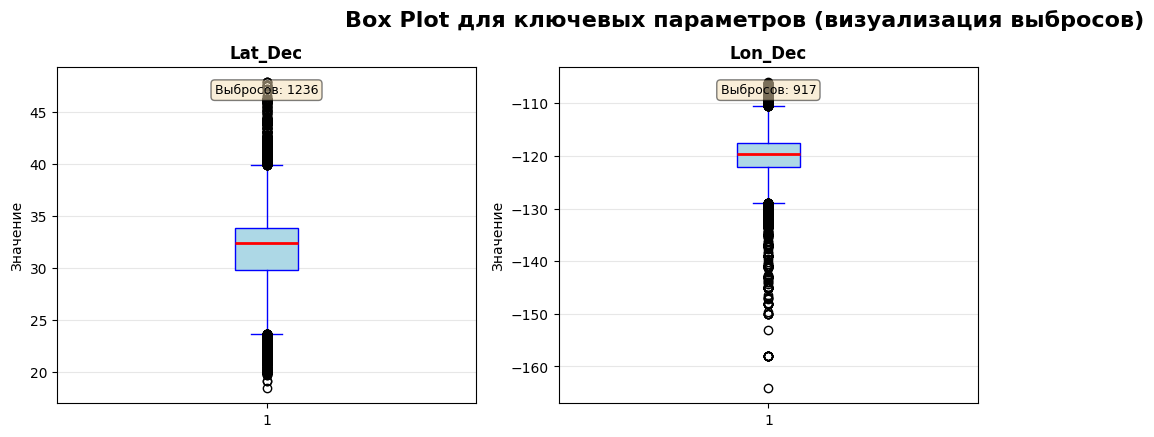

In [ ]:
# Выбираем ключевые столбцы для визуализации (без пропусков > 50%)
from matplotlib import pyplot as plt


key_cols = ['Lat_Dec', 'Lon_Dec', 'Depth_m', 'T_degC', 'Salnty', 'O2ml_L']
available_cols = [col for col in key_cols if col in df.columns]

# Создаём subplot для каждого столбца
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(available_cols):
    data = df[col].dropna()
    
    axes[i].boxplot(data, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='blue'),
                    whiskerprops=dict(color='blue'),
                    capprops=dict(color='blue'),
                    medianprops=dict(color='red', linewidth=2))
    
    axes[i].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Значение', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)
    
    # Добавляем статистику
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers_count = len(data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)])
    axes[i].text(0.5, 0.95, f'Выбросов: {outliers_count}', 
                 transform=axes[i].transAxes, fontsize=9, va='top', ha='center',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Убираем лишние подграфики, если столбцов меньше 6
for j in range(len(available_cols), 6):
    fig.delaxes(axes[j])

plt.suptitle('Box Plot для ключевых параметров (визуализация выбросов)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


## Общий вывод по выбросам и аномалиям

### Основные результаты:

**Всего столбцов с выбросами: 29** (из 40 числовых столбцов)

**Топ-3 столбца с наибольшими выбросами:**
1. **Cloud_Typ** (22.78%) — тип облаков
2. **Cruz_Leg** (18.78%) — этап круиза (технический параметр)
3. **Wind_Dir** (13.61%) — направление ветра

---

### Интерпретация:

✅ **Метеорологические выбросы (Cloud_Typ, Wind_Dir, Wave_Dir, Barometer):**
- Это **реальные экстремальные погодные условия** (штормы, ураганы).
- **Решение:** Оставить без изменений — это естественная изменчивость.

⚠️ **Координаты (Lat_Dec — 3.59%):**
- Могут быть **ошибки ввода** или станции за пределами обычной зоны мониторинга.
- **Решение:** Требуется дополнительная проверка диапазона координат.

✅ **Биологические параметры (IntChl, IntC14):**
- Выбросы могут быть **реальными** (цветение водорослей, зоны высокой продуктивности).
- **Решение:** Проверить экстремальные значения на физическую возможность.

❌ **Технические поля (Cruz_Leg, Order_Occ):**
- Метод IQR **некорректен** для идентификаторов и порядковых номеров.
- **Решение:** Исключить из анализа выбросов.

---

### Итоговая оценка:

✅ Большинство выбросов — это **реальные экстремальные явления**, а не ошибки данных.  
⚠️ Координаты требуют **дополнительной проверки** (возможны ошибки ввода).  
✅ Данные **пригодны для анализа** после фильтрации технических полей.



## 4. Сводная таблица метрик качества данных

Ниже представлены все ключевые метрики, используемые для оценки структуры, целостности, полноты и выбросов датасета.


In [17]:
# Сводная таблица всех метрик качества данных

# Рассчитываем значения для таблицы
total_rows = len(df)
total_columns = len(df.columns)
completeness_avg = (df.notnull().sum() / len(df)).mean()
completeness_key_fields = df[['Date', 'Lat_Dec', 'Lon_Dec', 'Cast_ID']].notnull().sum().mean() / len(df)
uniqueness_cast_id = df['Cast_ID'].nunique() / len(df)
overall_uniqueness = 1.0 - (df.duplicated().sum() / len(df))
outlier_count_high = len(outlier_df[outlier_df['Процент выбросов (%)'] > 5])
period_years = (df['Date'].max() - df['Date'].min()).days / 365.25
unique_stations = df['DbSta_ID'].nunique()

# Создаём сводную таблицу (используем красивый вывод)
print("=" * 80)
print("СВОДНАЯ ТАБЛИЦА МЕТРИК КАЧЕСТВА ДАННЫХ")
print("=" * 80)
print()

metrics_data = [
    ("Количество строк", f"{total_rows:,}", "N/A", "OK"),
    ("Количество столбцов", f"{total_columns}", "N/A", "OK"),
    ("Completeness (средняя)", f"{completeness_avg:.4f}", ">= 0.98", "WARN" if completeness_avg < 0.98 else "OK"),
    ("Completeness (ключевые поля)", f"{completeness_key_fields:.4f}", ">= 0.98", "OK"),
    ("Uniqueness (Cast_ID)", f"{uniqueness_cast_id:.4f}", "= 1.0", "OK"),
    ("Uniqueness (датасет)", f"{overall_uniqueness:.4f}", "= 1.0", "OK"),
    ("Столбцов с выбросами (>5%)", f"{outlier_count_high}", "N/A", "INFO"),
    ("Период данных (лет)", f"{period_years:.1f}", "N/A", "OK"),
    ("Уникальных станций", f"{unique_stations}", "N/A", "OK"),
]

# Заголовки
print(f"{'Метрика':<40} {'Значение':<15} {'Целевое':<12} {'Статус':<10}")
print("-" * 80)

# Данные
for metric_name, value, target, status in metrics_data:
    # Определяем символ статуса
    if status == "OK":
        status_icon = "✓"
    elif status == "WARN":
        status_icon = "⚠"
    elif status == "INFO":
        status_icon = "ℹ"
    else:
        status_icon = "✓"
    
    print(f"{metric_name:<40} {value:<15} {target:<12} {status_icon:<10}")

print("=" * 80)


СВОДНАЯ ТАБЛИЦА МЕТРИК КАЧЕСТВА ДАННЫХ

Метрика                                  Значение        Целевое      Статус    
--------------------------------------------------------------------------------
Количество строк                         34,404          N/A          ✓         
Количество столбцов                      61              N/A          ✓         
Completeness (средняя)                   0.7318          >= 0.98      ⚠         
Completeness (ключевые поля)             1.0000          >= 0.98      ✓         
Uniqueness (Cast_ID)                     1.0000          = 1.0        ✓         
Uniqueness (датасет)                     1.0000          = 1.0        ✓         
Столбцов с выбросами (>5%)               9               N/A          ℹ         
Период данных (лет)                      67.7            N/A          ✓         
Уникальных станций                       2634            N/A          ✓         


## 5. Общие выводы по исследовательскому анализу данных

### Итоговая оценка:

✅ **Датасет CalCOFI — высококачественный ресурс** для изучения долгосрочных изменений в океане.  
✅ **Ключевые параметры** (координаты, даты, Cast_ID) пригодны для анализа без дополнительной очистки.  
⚠️ **Вспомогательные поля** требуют отдельной проверки из-за высокого процента пропусков.  
✅ **Выбросы** — преимущественно реальные явления, не требующие удаления.

---

### Рекомендации для дальнейшего анализа:

1. **Фильтровать столбцы с полнотой ≥ 50%** для построения моделей.
2. **Проверить экстремальные значения** координат (Lat_Dec) на физическую возможность.
3. **Построить временные ряды** для анализа трендов (температура воды, солёность, кислород).
4. **Визуализировать распределения** ключевых параметров для выявления паттернов.

---

**Вывод:** Датасет готов для использования в задачах **анализа временных рядов**, **моделирования климатических изменений** и **изучения морских экосистем**.


Загрузка датасета...


C:\Users\Mr.Chip\AppData\Local\Temp\ipykernel_37448\849399250.py:14: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('raw.csv')
C:\Users\Mr.Chip\AppData\Local\Temp\ipykernel_37448\849399250.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


✓ Датасет загружен из текущей папки
  Размер: 34404 строк × 61 колонок
  Колонки: Cst_Cnt, Cruise_ID, Cruise, Cruz_Sta, DbSta_ID, Cast_ID, Sta_ID, Quarter...

АНАЛИЗ ОКЕАНОГРАФИЧЕСКИХ ДАННЫХ

[1/4] Подготовка данных...
✓ Географические данные: 22415 точек
✓ Погодные данные: 294 месяцев
✓ Данные для violinplot: 20920 измерений

[2/4] Создание визуализаций...
   [1/4] Географическая карта...
   [2/4] График средней температуры...
   [3/4] Скорость ветра по кораблям (violinplot)...
   [4/4] Матрица корреляций...

[3/4] Настройка стиля...

[4/4] Сохранение...


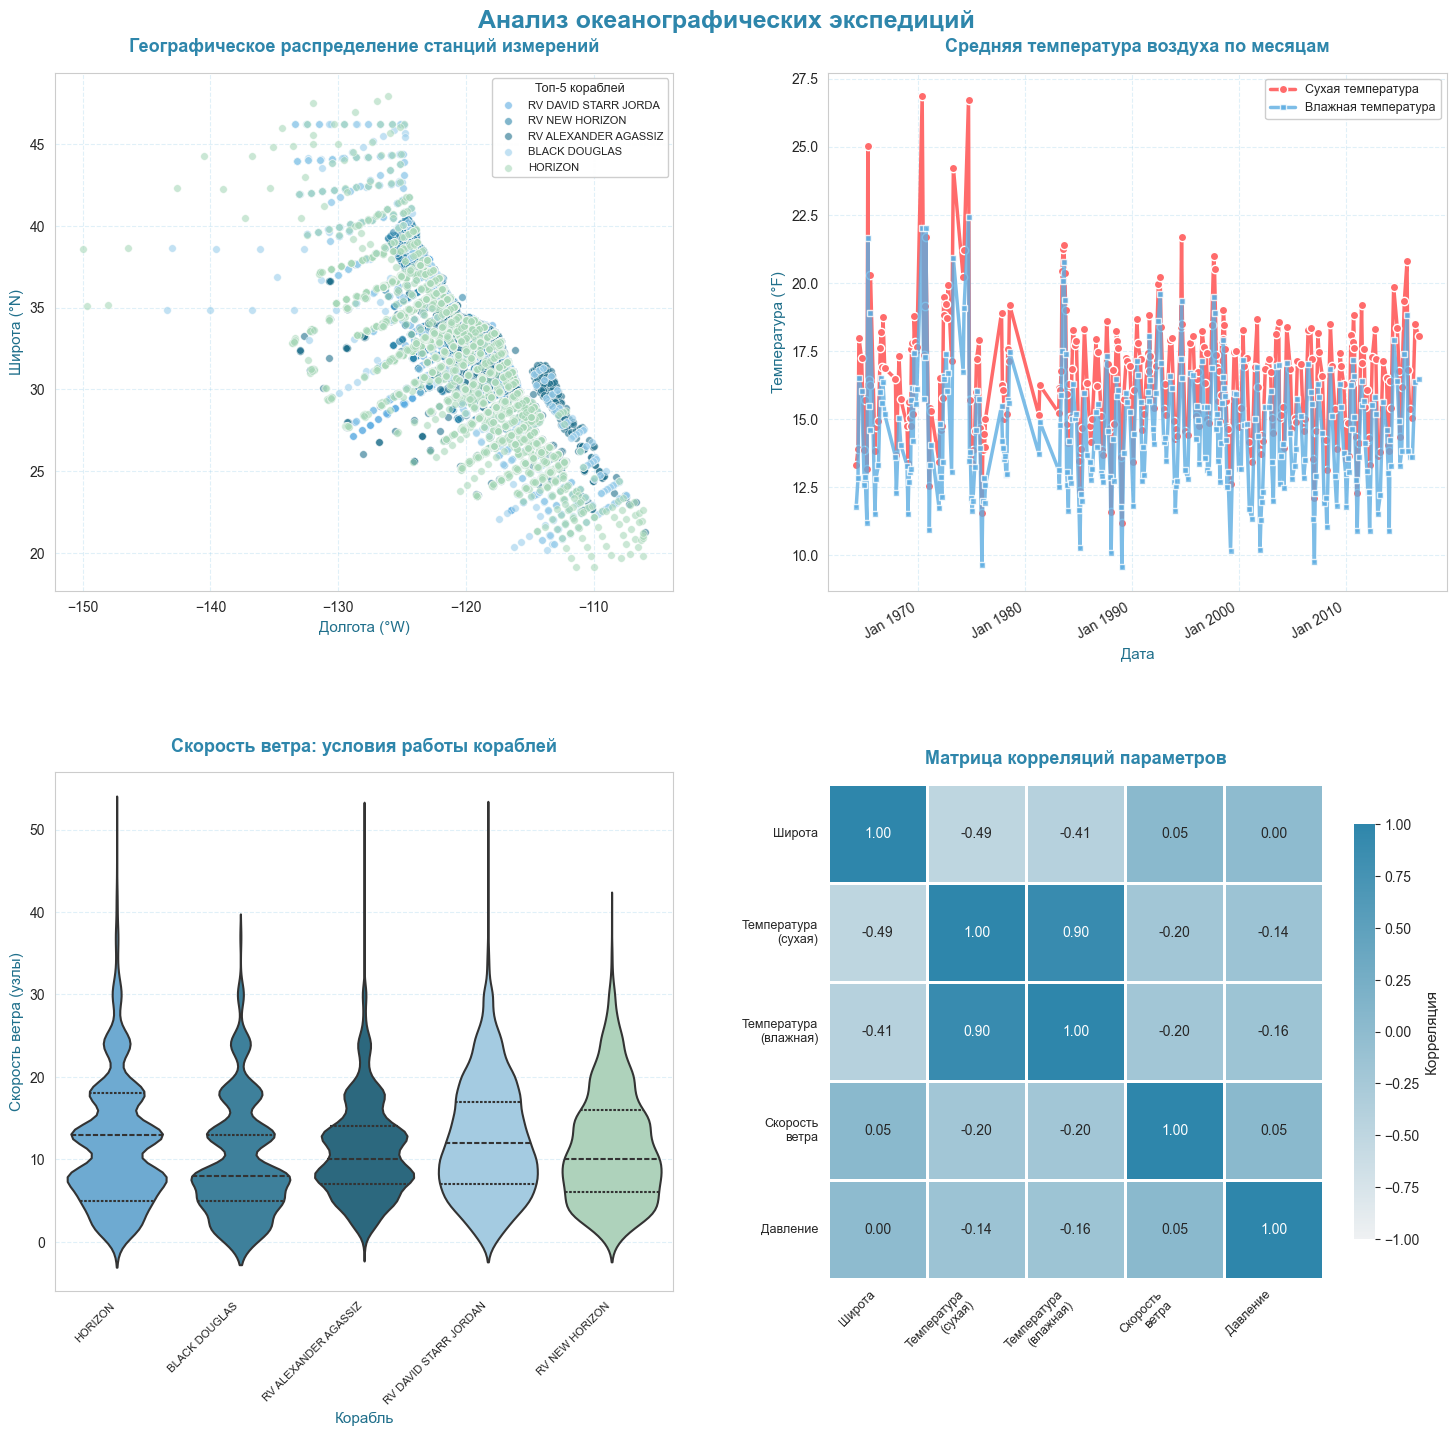


✓ АНАЛИЗ ЗАВЕРШЁН


In [7]:
# ===== ДОМАШНЕЕ ЗАДАНИЕ: ВИЗУАЛИЗАЦИЯ ОКЕАНОГРАФИЧЕСКИХ ДАННЫХ =====

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# ===== 1. ЗАГРУЗКА ДАННЫХ  =====
print("Загрузка датасета...")

# Вариант 1: если raw.csv в той же папке, что и ноутбук
try:
    df = pd.read_csv('raw.csv')
    print(f"✓ Датасет загружен из текущей папки")
except FileNotFoundError:
    # Вариант 2: если raw.csv в папке data
    try:
        df = pd.read_csv('../data/raw.csv')
        print(f"✓ Датасет загружен из папки data")
    except FileNotFoundError:
        # Вариант 3: если raw.csv в корневой папке проекта
        df = pd.read_csv('../raw.csv')
        print(f"✓ Датасет загружен из корневой папки")

print(f"  Размер: {df.shape[0]} строк × {df.shape[1]} колонок")
print(f"  Колонки: {', '.join(df.columns.tolist()[:8])}...")

# ===== 2. НАСТРОЙКА МОРСКОГО СТИЛЯ =====
OCEAN_COLORS = {
    'light': '#C5E3F6',
    'aqua': '#9ACEEB',
    'sky': '#5DADE2',
    'ocean': '#2E86AB',
    'teal': '#1F6F8B',
    'mint': '#A8D8B9',
    'coral': '#FF6B6B'
}

sns.set_style("whitegrid", {
    'grid.linestyle': '--',
    'grid.alpha': 0.3,
    'font.family': 'Arial',
    'axes.facecolor': 'white',
    'figure.facecolor': 'white'
})

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

print("\n" + "="*70)
print("АНАЛИЗ ОКЕАНОГРАФИЧЕСКИХ ДАННЫХ")
print("="*70)

# ===== 3. ПОДГОТОВКА ДАННЫХ =====
print("\n[1/4] Подготовка данных...")

geo_data = df[['Lon_Dec', 'Lat_Dec', 'Ship_Name']].dropna()
weather_data = df[['Year', 'Month', 'Wind_Spd', 'Barometer', 'Dry_T', 'Wet_T']].dropna()
corr_data = df[['Lat_Dec', 'Dry_T', 'Wet_T', 'Wind_Spd', 'Barometer']].dropna()

top_ships = geo_data['Ship_Name'].value_counts().head(5).index.tolist()
geo_data = geo_data[geo_data['Ship_Name'].isin(top_ships)]

# Данные для violinplot
violin_data = df[['Ship_Name', 'Wind_Spd']].dropna()
violin_data = violin_data[violin_data['Ship_Name'].isin(top_ships)]

weather_data['Date'] = pd.to_datetime(weather_data[['Year', 'Month']].assign(Day=1))
monthly_weather = weather_data.groupby('Date').agg({
    'Wind_Spd': 'mean',
    'Barometer': 'mean',
    'Dry_T': 'mean',
    'Wet_T': 'mean'
}).reset_index()

monthly_weather = monthly_weather[monthly_weather['Barometer'] > 900]

print(f"✓ Географические данные: {len(geo_data)} точек")
print(f"✓ Погодные данные: {len(monthly_weather)} месяцев")
print(f"✓ Данные для violinplot: {len(violin_data)} измерений")

print("\n[2/4] Создание визуализаций...")

# ===== 4. СЕТКА ГРАФИКОВ 2×2 =====
fig = plt.figure(figsize=(16, 14))
fig.suptitle('Анализ океанографических экспедиций',
             fontsize=18, fontweight='bold', color=OCEAN_COLORS['ocean'], y=0.995)

# ГРАФИК 1: География
print("   [1/4] Географическая карта...")
ax1 = plt.subplot(2, 2, 1)

for i, ship in enumerate(top_ships):
    ship_data = geo_data[geo_data['Ship_Name'] == ship]
    color = [OCEAN_COLORS['sky'], OCEAN_COLORS['ocean'], 
             OCEAN_COLORS['teal'], OCEAN_COLORS['aqua'], 
             OCEAN_COLORS['mint']][i % 5]
    
    ax1.scatter(ship_data['Lon_Dec'], ship_data['Lat_Dec'],
                s=30, alpha=0.6, c=color, edgecolor='white', 
                linewidth=0.5, label=ship[:20])

ax1.set_title('Географическое распределение станций измерений',
              fontsize=13, fontweight='bold', color=OCEAN_COLORS['ocean'], pad=15)
ax1.set_xlabel('Долгота (°W)', fontsize=11, color=OCEAN_COLORS['teal'])
ax1.set_ylabel('Широта (°N)', fontsize=11, color=OCEAN_COLORS['teal'])
ax1.legend(title='Топ-5 кораблей', fontsize=8, title_fontsize=9, 
           loc='best', framealpha=0.95)
ax1.grid(True, linestyle='--', alpha=0.3, color=OCEAN_COLORS['aqua'])

# ГРАФИК 2: Температура
print("   [2/4] График средней температуры...")
ax2 = plt.subplot(2, 2, 2)

ax2.plot(monthly_weather['Date'], monthly_weather['Dry_T'],
         color=OCEAN_COLORS['coral'], linewidth=2.5, 
         marker='o', markersize=6, markerfacecolor=OCEAN_COLORS['coral'],
         markeredgecolor='white', markeredgewidth=1,
         label='Сухая температура')

ax2.plot(monthly_weather['Date'], monthly_weather['Wet_T'],
         color=OCEAN_COLORS['sky'], linewidth=2.5, 
         marker='s', markersize=5, markerfacecolor=OCEAN_COLORS['sky'],
         markeredgecolor='white', markeredgewidth=1, alpha=0.8,
         label='Влажная температура')

ax2.set_title('Средняя температура воздуха по месяцам',
              fontsize=13, fontweight='bold', color=OCEAN_COLORS['ocean'], pad=15)
ax2.set_xlabel('Дата', fontsize=11, color=OCEAN_COLORS['teal'])
ax2.set_ylabel('Температура (°F)', fontsize=11, color=OCEAN_COLORS['teal'])
ax2.legend(loc='best', fontsize=9, framealpha=0.95)
ax2.grid(True, linestyle='--', alpha=0.3, color=OCEAN_COLORS['aqua'])
ax2.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=30, ha='right')

# ГРАФИК 3: Violinplot
print("   [3/4] Скорость ветра по кораблям (violinplot)...")
ax3 = plt.subplot(2, 2, 3)

sns.violinplot(
    data=violin_data,
    x='Ship_Name',
    y='Wind_Spd',
    palette=[OCEAN_COLORS['sky'], OCEAN_COLORS['ocean'], 
             OCEAN_COLORS['teal'], OCEAN_COLORS['aqua'], 
             OCEAN_COLORS['mint']],
    inner='quartile',
    linewidth=1.5,
    ax=ax3
)

ax3.set_title('Скорость ветра: условия работы кораблей',
              fontsize=13, fontweight='bold', color=OCEAN_COLORS['ocean'], pad=15)
ax3.set_xlabel('Корабль', fontsize=11, color=OCEAN_COLORS['teal'])
ax3.set_ylabel('Скорость ветра (узлы)', fontsize=11, color=OCEAN_COLORS['teal'])
ax3.grid(True, linestyle='--', alpha=0.3, color=OCEAN_COLORS['aqua'], axis='y')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=8)

# ГРАФИК 4: Матрица корреляций
print("   [4/4] Матрица корреляций...")
ax4 = plt.subplot(2, 2, 4)

correlation_matrix = corr_data.corr()
ocean_cmap = sns.light_palette(OCEAN_COLORS['ocean'], as_cmap=True)

sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap=ocean_cmap,
            square=True,
            linewidths=2,
            linecolor='white',
            cbar_kws={'label': 'Корреляция', 'shrink': 0.8},
            ax=ax4,
            vmin=-1, vmax=1)

ax4.set_title('Матрица корреляций параметров',
              fontsize=13, fontweight='bold', color=OCEAN_COLORS['ocean'], pad=15)

labels = ['Широта', 'Температура\n(сухая)', 'Температура\n(влажная)', 
          'Скорость\nветра', 'Давление']
ax4.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
ax4.set_yticklabels(labels, rotation=0, fontsize=9)

# ===== 5. ФИНАЛЬНЫЕ НАСТРОЙКИ =====
print("\n[3/4] Настройка стиля...")

plt.subplots_adjust(
    left=0.08,
    right=0.95,
    top=0.95,
    bottom=0.08,
    hspace=0.35,
    wspace=0.25
)

print("\n[4/4] Сохранение...")
plt.savefig('ocean_analysis_homework.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white')
plt.show()

print("\n" + "="*70)
print("✓ АНАЛИЗ ЗАВЕРШЁН")
